In [53]:
#!pip install pygame

In [1]:
import pygame
from math import sin, cos, pi, radians, sqrt, atan


class Car(object):
    def __init__(self):
        """
        Создание машинки
        """
        self.x = 360                                        # координата x
        self.y = 240                                        # координата y
        self.angle = 0.0                                    # угол поворота в градусах
        self.V = 10                                         # скорость
        self.weidth = 50                                    # ширина
        self.height = 30                                    # высота
        self.vel_x = self.V * cos(radians(self.angle))      # скорость по оси x
        self.vel_y = self.V * sin(radians(self.angle))      # скорость по оси y
        
        #углы для проверки
        self.angle1 = 0
        self.angle2 = -30
        self.angle3 = 30
        self.angle4 = -45
        self.angle5 = 45
        
        self.original_image = pygame.image.load('car.png')
        self.image = self.original_image
        self.rect = self.image.get_rect()
        self.rect.center = (self.x, self.y)

    def update(self):
        """
        Обнавление координат
        """
        self.vel_x = self.V * cos(radians(self.angle))
        self.vel_y = self.V * sin(radians(self.angle))
        #self.x += self.vel_x
        #self.y += self.vel_y
        self.image = pygame.transform.rotate(self.original_image, -self.angle)
        x, y = self.rect.center  # Save its current center.
        self.rect = self.image.get_rect()  # Replace old rect with new rect.
        
        return [self.vel_x, self.vel_y]
        
    #def handle_keys(self):
        #""" Обработка нажатых клавиш """
        #key = pygame.key.get_pressed()
        #if key[pygame.K_RIGHT]:
        #    self.angle = (self.angle + 3) % 360
        #elif key[pygame.K_LEFT]:
        #    self.angle = (self.angle - 3) % 360
        
    def get_ray(self):
        """
        Возвращает информацию о лучах
        """
        return [[cos(radians(self.angle + self.angle1)), sin(radians(self.angle + self.angle1))],\
                [cos(radians(self.angle + self.angle2)), sin(radians(self.angle + self.angle2))],\
                [cos(radians(self.angle + self.angle3)), sin(radians(self.angle + self.angle3))],\
                [cos(radians(self.angle + self.angle4)), sin(radians(self.angle + self.angle4))],\
                [cos(radians(self.angle + self.angle5)), sin(radians(self.angle + self.angle5))]]
    
    def get_center(self):
        """
        Возвращает центр машинки
        """
        return [self.x + self.image.get_rect()[2] / 2, self.y + self.image.get_rect()[3] / 2]
        
    def get_front(self):
        """
        Возвращает точки колижена у машинки (перед машинки)
        """
        return [[self.x + self.image.get_rect()[2] / 2 + cos(radians(self.angle)) * self.weidth/2 + sin(radians(self.angle)) * self.height/2, \
                 self.y + self.image.get_rect()[3] / 2 + sin(radians(self.angle)) * self.weidth/2 - cos(radians(self.angle)) * self.height/2], \
                [self.x + self.image.get_rect()[2] / 2 + cos(radians(self.angle)) * self.weidth/2 - sin(radians(self.angle)) * self.height/2, \
                 self.y + self.image.get_rect()[3] / 2 + sin(radians(self.angle)) * self.weidth/2 + cos(radians(self.angle)) * self.height/2]]
        
    def get_position(self):
        """
        Возвражает позицию машинки [point], angle, weidth, height
        """
        return [self.x, self.y], self.angle, self.weidth, self.height
    
    def drive_right(self):
        """
        Поворот направо
        """
        self.angle = (self.angle + 3) % 360
    
    def drive_left(self):
        """
        Поворот налево
        """
        self.angle = (self.angle - 3) % 360
    
    def draw(self, surface):
        """
        Отрисовка машины
        Параметр surface - дисплей
        """
        surface.blit(self.image, (self.x, self.y))

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import random
import numpy as np

#ТРАССА
class Objects(object):
    def __init__(self, surface, car):
        """
        Создает информацию о трассе и начальный гараж
        Параметр surface - дисплей приложения
        Параметр car - машина(изначально машина должна быть в гараже)
        """
        self.objects = []
        self.surface = surface
        
        self.way = 3
        self.r = 0
        self.last_point, self.last_angle, self.weidth, self.height = car.get_position()
        
        self.objects.append([[self.last_point[0] - 0.5 * self.weidth, self.last_point[1] + 1.5*self.height],[self.last_point[0] - 0.5 * self.weidth, self.last_point[1] - 0.5*self.height]])
        self.objects.append([[self.last_point[0] - 0.5 * self.weidth, self.last_point[1] + 1.5*self.height],[self.last_point[0] + 1.5 * self.weidth, self.last_point[1] + 1.5*self.height]])
        self.objects.append([[self.last_point[0] - 0.5 * self.weidth, self.last_point[1] - 0.5*self.height],[self.last_point[0] + 1.5 * self.weidth, self.last_point[1] - 0.5*self.height]])
        
        self.last_point = [self.last_point[0] + 1.5 * self.weidth, self.last_point[1] + 0.5*self.height]
    
        self.objects.append([self.last_point, self.last_point])
    
    def generate(self):
        """
        Создает продолжение трассы
        """
        for i in range(100):
            angle = random.randint(-30, 30)
            l = random.randint(self.height, 5 * self.height)
            a = random.randint(self.weidth * 1.5, self.weidth * 3) / 2
            
            point = self.last_point
            self.last_point = [self.last_point[0] + cos(radians(self.last_angle)) * l, self.last_point[1] + sin(radians(self.last_angle)) * l]
            
            # находим половину угла между обратным 1 и 2 векторами и пребавляем к наименьшему???
            # ((angle1 + 180) - angle2) / 2 + angle 2
            # ((angle1 + 180) - angle1 - angle) / 2 + angle1 + angle
            # (90 - angle / 2) + angle1 + angle
            # angle1 + angle/2 + 90
            # где ошибка????
            
            ## ОШИБКА БЫЛА В ТОМ ЧТО У КОСИНУСа ЗАБЫЛ ПОСТАВИТЬ RADIANS!!!
            ## Как же у меня бомбит часа 2 это искал
            
            #print(self.last_angle, angle, angle1, angle2)
            
            angle1 = self.last_angle + 90 + angle / 2
            angle2 = self.last_angle - 90 + angle / 2
            
            p1 = [self.last_point[0] + cos(radians(angle1)) * a, self.last_point[1] + sin(radians(angle1)) * a]
            p2 = [self.last_point[0] + cos(radians(angle2)) * a, self.last_point[1] + sin(radians(angle2)) * a]
            
            self.objects.append([self.objects[-3][1], p1])
            self.objects.append([self.objects[-3][1], p2])
            
            self.last_angle += angle
            
            self.objects.append([point, self.last_point])
    
    def update(self, vel_x, vel_y):
        """
        Обнавление трассы (Игра движится движением трарссы)
        Параметр vel_x - смещение по x
        Параметр vel_y - смещение по y
        """
        for i in range(len(self.objects)):
            self.objects[i] = [[self.objects[i][0][0] - vel_x, self.objects[i][0][1] - vel_y], [self.objects[i][1][0] - vel_x, self.objects[i][1][1] - vel_y]] 
    
    def draw(self):
        """
        Отрисовка трассы
        """
        for line in self.objects:
            pygame.draw.line(self.surface, (0,0,0), line[0], line[1])
    
    def check_end(self, car):
        """
        Проверка конца игры
        Параметр car - машина в игре
        """
        pos = car.get_front()
        pos = np.mean(pos, axis=0)
        if np.linalg.norm( np.subtract(pos, self.objects[self.way][0])) > np.linalg.norm( np.subtract(self.objects[self.way][1], self.objects[self.way][0])):
            self.way += 3
        
        if(self.way > 303):
            #Победа
            self.r = 200
            return False
        
        front_car = car.get_front()
        
        if self.pseudoscalar(self.objects[self.way-2][1], front_car[1], self.objects[self.way-2][0]) == self.pseudoscalar(self.objects[self.way-1][1], front_car[0], self.objects[self.way-1][0]): 
           #self.pseudoscalar(self.objects[self.way+1][1], front_car[0], self.objects[self.way+1][0]) == self.pseudoscalar(self.objects[self.way+2][1], front_car[1], self.objects[self.way+2][0])):
            #Проигрыш
            self.r = -500
            return False
            
        self.r = 1
        return True
        
    def get_state(self, car):
        """
        Возвращает информацию о состоянии игры
        Инфомация это точка пересечения 5-и прямых
        Параметр car - Машина
        """
        center_car = car.get_center()
        ray_state = car.get_ray()
        
        l = [None] * 6
        l[5] = center_car
        
        for j in range(len(l) - 1):
            #print(j)
            continu = False
            for i in range(self.way, len(self.objects) + 1, 3):
                #print(i)
                for k in range(1, 3):
                    p0 = np.sum([center_car, ray_state[j]], axis=0)
                    p1 = center_car
                
                    p3 = self.objects[i - k][1]
                    p2 = self.objects[i - k][0]
            
                    A1 = p0[1] - p1[1]
                    B1 = p1[0] - p0[0]
                    C1 = p0[0]*p1[1] - p1[0]*p0[1]
                    A2 = p2[1] - p3[1]
                    B2 = p3[0] - p2[0]
                    C2 = p2[0]*p3[1] - p3[0]*p2[1]
 
                    if B1*A2 - B2*A1 and A1:
                        y = (C2*A1 - C1*A2) / (B1*A2 - B2*A1)
                        x = (-C1 - B1*y) / A1
                        if (min(p2[0], p3[0]) <= x <= max(p2[0], p3[0]) and
                            np.sign(x - p0[0]) == np.sign(ray_state[j][0])):
                            continu = True
                            l[j] = [x, y]
                    
                    elif B1*A2 - B2*A1 and A2:
                        y = (C2*A1 - C1*A2) / (B1*A2 - B2*A1)
                        x = (-C2 - B2*y) / A2
                        if (min(p2[0], p3[0]) <= x <= max(p2[0], p3[0]) and
                            np.sign(x - p0[0]) == np.sign(ray_state[j][0])):
                            continu = True
                            l[j] = [x, y]
                        
                
                if continu:
                    break
                    
        
        self.l = l
        #return l
        
        n = [0] * 5
        
        for i in range(len(l) - 1):
            if l[i] != None:
                n[i] = np.linalg.norm(np.subtract(l[i], l[5])) 
        
        maxarg = float('-inf')
        for i in n:
            if i > maxarg:
                maxarg = i
        
        if maxarg == 0:
          return n
        
        return np.divide(n, maxarg)
        
    def pseudoscalar(self, a, b, tail):
        """
        Псевдасколярное произведение
        параметр a - конец 1 вектора
        параметр b - конец 2 вектора
        параметр tail - начало векторов
        """
        a = np.subtract(a, tail)
        b = np.subtract(b, tail)
        return np.sign(a[0] * b[1] - a[1] * b[0])
    
    def get_reward(self):
        return self.r

In [3]:
class Game(object):
    def __init__(self, draw):
        """
        Игра
        Параметр draw - bool значение будет или нет отрисовываться игра
        """
        self.screen = None
        self.draw = draw
        if self.draw:
            pygame.init()
            self.screen = pygame.display.set_mode((720, 480))
        
        self.car = Car()
        self.objects = Objects(self.screen, self.car)
        self.objects.generate()
        #self.clock = pygame.time.Clock()
        
        self.running = True
        
        if self.draw:
            self.screen.fill((255,255,255))
            self.car.draw(self.screen)
            self.objects.draw()
        
            pygame.display.update()
    
    def reset(self):
        """
        Перезапуск игры
        Возвращает состояние игры
        """
        self.car = Car()
        self.objects = Objects(self.screen, self.car)
        self.objects.generate()
        return self.objects.get_state(self.car)
    
    def next_state(self, action):
        """
        Перейти у следующиму состоянию игры
        Параметр action - действие которое совершит игра
        Возвращает состояние игры
        """
        if action == -1:
            self.running = False
        elif action == 0:
            self.car.drive_left()
        elif action == 1:
            self.car.drive_right()
        
        (vel_x, vel_y) = self.car.update()
        self.objects.update(vel_x, vel_y)
        
        if self.draw:
            self.screen.fill((255,255,255))
            self.car.draw(self.screen)
            self.objects.draw()
            pygame.display.update()
            
        self.running = self.objects.check_end(self.car)
        
        state = self.objects.get_state(self.car)
        reward = self.objects.get_reward()
        return state, reward, self.running
    
    def get_screen(self):
        """
        Возвращает дисплей
        """
        return self.screen
    
    def get_n_actions(self):
        """
        Возвращает количество возможных действий
        """
        return 2
    
    def get_state_dim(self):
        """
        Количество передаваемых параметров
        """
        return 6

In [27]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.display import clear_output


class RL(object):
    def __init__(self):
        """
        RL бот
        """
        
        self.clock = pygame.time.Clock()
        
        self.game = Game(False)
        
        self.n_actions = self.game.get_n_actions()
        self.state_dim = self.game.get_state_dim()
        
        self.agent = MLPClassifier(
                        hidden_layer_sizes=(20, 20),
                        activation='relu',
                        solver='adam',
                        warm_start=True,  # keep progress between .fit(...) calls
                        max_iter=1,  # make only 1 iteration on each .fit(...)
                        )
        
        self.agent.fit([self.game.reset()]*self.n_actions, range(self.n_actions))
        
        
    def generate_session(self):
        """
        Игравая сессия
        Возвращает список состояний, список действий и общий ревард
        """
        states, actions = [], []
        total_reward = 0

        s = self.game.reset()

        while True:

            # predict array of action probabilities
        
            probs = self.agent.predict_proba([s])[0]

            a = np.random.choice([0,1], p = probs)

            new_s, r, done = self.game.next_state(a)
        
            # record sessions like you did before
            states.append(s)
            actions.append(a)
            total_reward += r

            s = new_s
            if done == False:
                break
            
            #pygame.time.delay(1)
    
        return states, actions, total_reward
        
    def select_elites(self, states_batch, actions_batch, rewards_batch, percentile=50):
        """
        Выбирает лучшие сессии, ревард который >=  percentile
        Параметр states_batch: список списков состояний во всех сессиях
        Параметр actions_batch: список списков действий на каждое состояние во всех сессиях
        Параметр rewards_batch: список ревардов в сесиях

        Восвращает список списков лучших состояниях и лействий
        """

        reward_threshold = np.percentile(rewards_batch, q = percentile)

        id = np.where(rewards_batch >= reward_threshold)
    
        elite_states = np.concatenate(np.array(states_batch)[id])
        elite_actions = np.concatenate(np.array(actions_batch)[id])

        return elite_states, elite_actions
        
    def show_progress(self, rewards_batch, log, percentile, reward_range=[-990, +10]):
        """
        A convenience function that displays training progress. 
        No cool math here, just charts.
        """

        mean_reward = np.mean(rewards_batch)
        threshold = np.percentile(rewards_batch, percentile)
        log.append([mean_reward, threshold])

        clear_output(True)
        print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
        plt.figure(figsize=[8, 4])
        plt.subplot(1, 2, 1)
        plt.plot(list(zip(*log))[0], label='Mean rewards')
        plt.plot(list(zip(*log))[1], label='Reward thresholds')
        plt.legend()
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.hist(rewards_batch, range=reward_range)
        plt.vlines([np.percentile(rewards_batch, percentile)],
                   [0], [100], label="percentile", color='red')
        plt.legend()
        plt.grid()

        plt.show()
            
    def cross_enropy(self, n_sessions = 200, percentile = 70, epoch = 20):
        """
        Метод кросс энтропии для обучения бота
        Параметр n_session - количесвто сессий на каждую эпоху
        Параметр precentile - сколько % сессий отбросится
        Параметр epoch - количество эпох
        """
        log = []
            
        for i in range(10):
            # generate new sessions
            sessions = [self.generate_session() for _ in range(n_sessions)]

            states_batch, actions_batch, rewards_batch = map(np.array, zip(*sessions))

            print((states_batch, actions_batch, rewards_batch))
    
            elite_states, elite_actions = self.select_elites(states_batch, actions_batch, rewards_batch,  percentile = percentile )

            self.agent.fit(elite_states, elite_actions)

            self.show_progress(rewards_batch, log, percentile, reward_range=[0, max(0, np.max(rewards_batch))])
                
    def save(self, path):
        """
        Сохранение модели
        Параметр path - путь для сохранения весов модели
        """
        with open(path, 'wb') as f:
            pickle.dump(self.agent, f )
        
    def load(self, path):
        """
        Загрузка модели
        Параметр path - путь для загрузки весов модели
        """
        with open(path, 'rb') as f:
            self.agent = pickle.load(f)
                
    def play_game(self):
        """
        Игровая сессия, показывает как обучилась модель в игре
        """
        total_reward = 0
        game2 = Game(True)
        s = game2.reset()
    
        screen = game2.get_screen()
    
        wnd = game2.get_screen()
    
        for _ in range(10000):

            # predict array of action probabilities
            probs = self.agent.predict_proba([s])[0]

            #a = np.random.choice([0,1], p = probs)
            a = np.argmax(probs)
        
            new_s, r, done = game2.next_state(a)
        
            # record sessions like you did before
            total_reward += r

            for p in game2.objects.l:
                #print(p)
                if p != None:
                    pygame.draw.circle(screen, (255,0,0), [int(p[0]), int(p[1])], 3)
        
            pygame.display.update()
        
            s = new_s
            if done == False:
                break
            
            self.clock.tick(60)
                

In [24]:
#game = Game(True)

#screen = game.get_screen()

#done = True
#while done:
#    action = -2
#    while action == -2:
#        #keys = pygame.key.get_pressed()    
#        ##Если нажата вверх
#        #if keys[pygame.K_RIGHT]:
#        #    action = 1
#        ##Если нажата вниз
#        #if keys[pygame.K_LEFT]:
#        #    action = 0
#        for event in pygame.event.get():
#            #Выход
#            if event.type == pygame.QUIT:
#                done = False
#                pygame.quit()
#            if event.type == pygame.KEYDOWN:
#                if event.key == pygame.K_RIGHT:
#                    action = 1
#                if event.key == pygame.K_LEFT:
#                    action = 0
#                    game.reset()
#                if event.key == pygame.K_ESCAPE:
#                    done = False
#                    pygame.quit()
#                    
#    state, reward, done = game.next_state(action)
#    
#    #print(state)
#    
#    #for s in state:
#        #if s != None:
#        #    pygame.draw.circle(screen, (255,0,0), [int(s[0]), int(s[1])], 3)
#            
#    pygame.display.update()
#
#pygame.quit()

In [25]:
rl = RL()
rl.load('Car(55).sav')

for _ in range(1000):
    rl.play_game()

C:\Users\PM65M\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


KeyboardInterrupt: 

mean reward = -475.685, threshold=-472.000


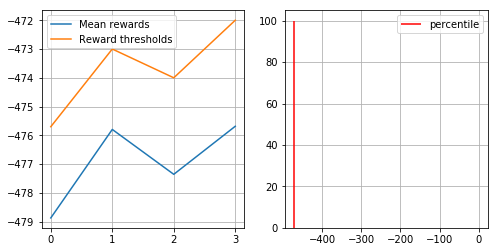

KeyboardInterrupt: 

In [28]:
rl = RL()
rl.cross_enropy()

for _ in range(1000):
    rl.play_game()